In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
! ls ../input

2014_add.csv   condition_add.csv  stadium.csv  train.csv
condition.csv  sample_submit.csv  test.csv     train_add.csv


In [3]:
train_df = pd.concat([pd.read_csv('../input/train.csv'),
                      pd.read_csv('../input/train_add.csv')])
test_df = pd.read_csv('../input/test.csv')

all_df = pd.concat([train_df, test_df])
all_df.info()
all_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2266 entries, 0 to 312
Data columns (total 11 columns):
away       2266 non-null object
gameday    2266 non-null object
home       2266 non-null object
id         2266 non-null int64
match      2266 non-null object
stadium    2266 non-null object
stage      2266 non-null object
time       2266 non-null object
tv         2266 non-null object
y          1953 non-null float64
year       2266 non-null int64
dtypes: float64(1), int64(2), object(8)
memory usage: 212.4+ KB


,away,gameday,home,id,match,stadium,stage,time,tv,y,year
0,鹿島アントラーズ,03/10(土),ベガルタ仙台,13994,第１節第１日,ユアテックスタジアム仙台,Ｊ１,14:04,スカパー／ｅ２／スカパー光／ＮＨＫ総合,18250.0,2012
1,清水エスパルス,03/10(土),名古屋グランパス,13995,第１節第１日,豊田スタジアム,Ｊ１,14:04,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋,24316.0,2012
2,ヴィッセル神戸,03/10(土),ガンバ大阪,13996,第１節第１日,万博記念競技場,Ｊ１,14:04,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪,17066.0,2012
3,浦和レッズ,03/10(土),サンフレッチェ広島,13997,第１節第１日,エディオンスタジアム広島,Ｊ１,14:06,スカパー／ｅ２／スカパー光／ＮＨＫ広島,29603.0,2012
4,ジュビロ磐田,03/10(土),コンサドーレ札幌,13998,第１節第１日,札幌ドーム,Ｊ１,14:04,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／ＮＨＫ札幌,25353.0,2012


# EDA

## 観客数（目的変数）: y

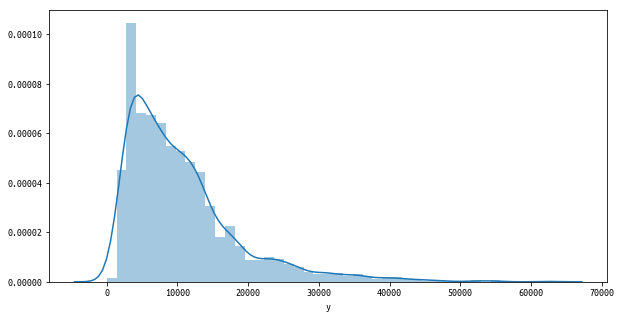

In [4]:
plt.figure(figsize=(10, 5))
sns.distplot(train_df['y'])
plt.show()

## 開催年度: year
- 観客動員数に特に影響なさそう

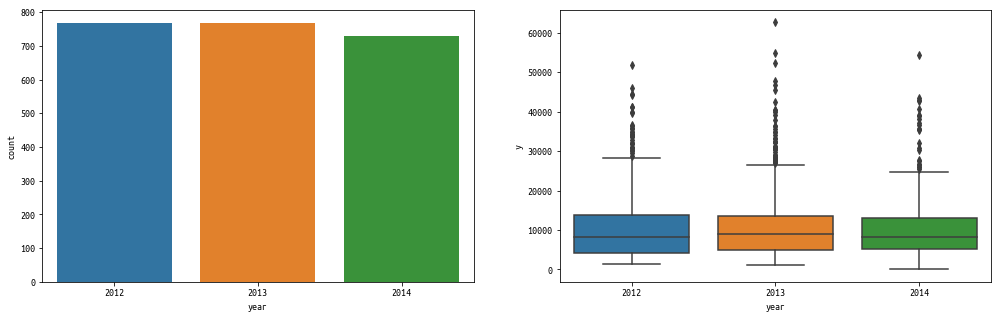

In [5]:
plt.figure(figsize=(17, 5))

plt.subplot(1, 2, 1)
sns.countplot(all_df['year'])

plt.subplot(1, 2, 2)
sns.boxplot(x='year', y='y' , data=all_df)
plt.show()

## 開催節: match

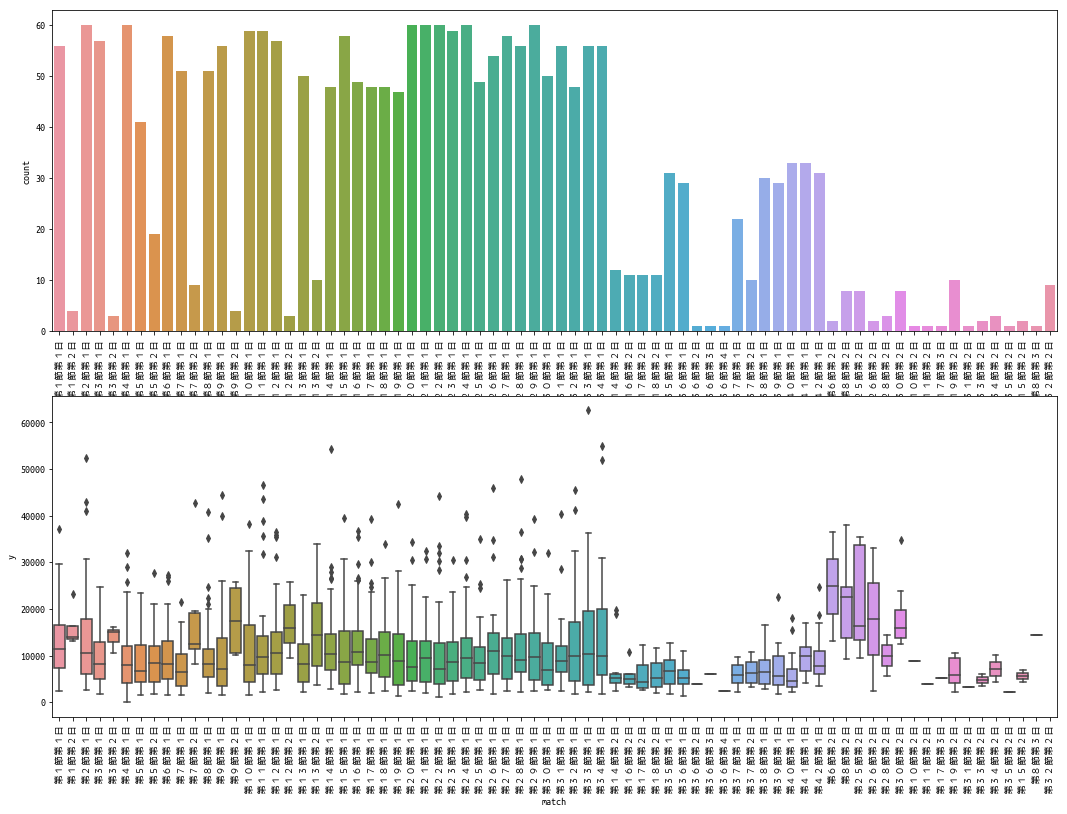

In [6]:
plt.figure(figsize=(18, 13))

plt.subplot(2, 1, 1)
sns.countplot(all_df['match'])
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
sns.boxplot(x='match', y='y' , data=all_df)
plt.xticks(rotation=90)
plt.show()

- '節'と'日'に分ける
    - '節'は使えそうだけど'日'はデータ数もばらついて使えなさそう    

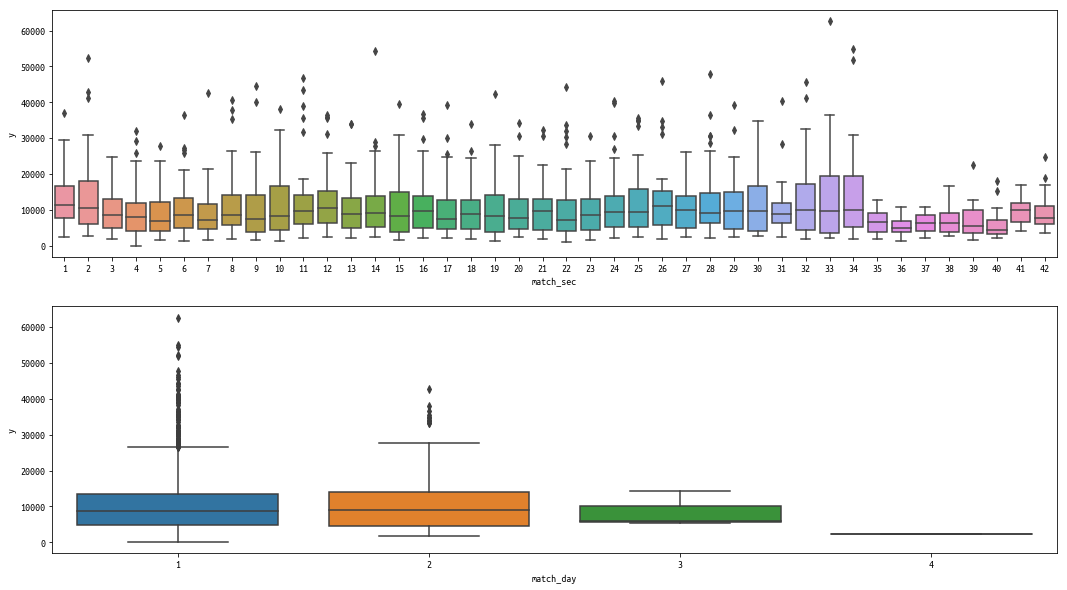

In [7]:
all_df['match_sec'] = all_df['match'].apply(lambda x: int(x[1:].split('節')[0]))
all_df['match_day'] = all_df['match'].apply(lambda x: int(x[:-1].rsplit('第', 1)[-1]))

plt.figure(figsize=(18, 10))
plt.subplot(2, 1, 1)
sns.boxplot(x='match_sec', y='y' , data=all_df)

plt.subplot(2, 1, 2)
sns.boxplot(x='match_day', y='y' , data=all_df)
plt.show()

## 試合日: gameday

### 月
- 12月は観客動員数が多いけどデータ数が少なくて怪しい

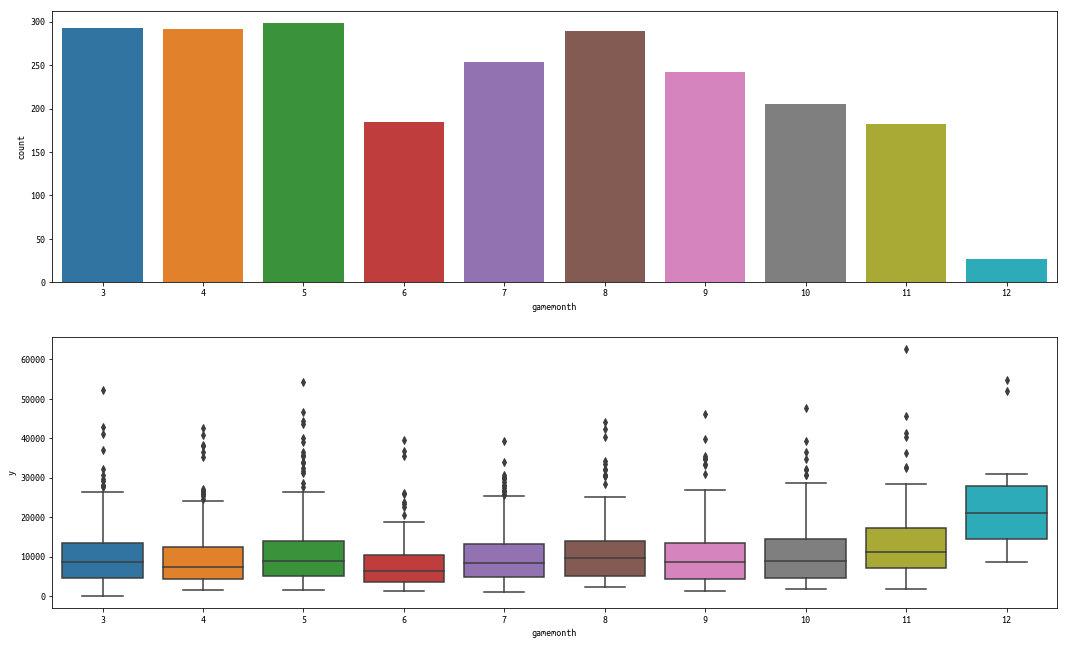

In [8]:
def get_month(day):
    if type(day) is str:
        return int(day.split('/', 1)[0])
    return day

all_df['gamemonth'] = all_df['gameday'].apply(get_month)

plt.figure(figsize=(18, 11))

plt.subplot(2, 1, 1)
sns.countplot(all_df['gamemonth'])

plt.subplot(2, 1, 2)
sns.boxplot(x='gamemonth', y='y' , data=all_df)
plt.show()

### 曜日
- 試合の殆どは土日
- 土日では土曜日のほうが客が多い
- 水曜日にもよく試合している
    - そして観客動員数も日曜より多そう

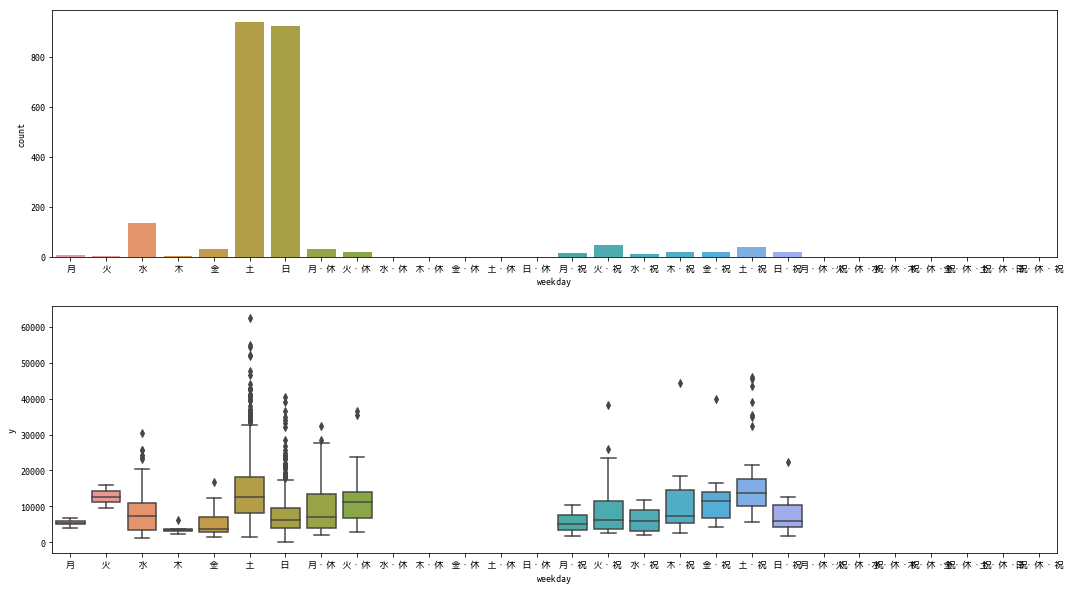

In [9]:
weeks = list('月火水木金土日')
weeks += [w + '・休' for w in weeks]
weeks += [w + '・祝' for w in weeks]

all_df['weekday'] = all_df['gameday'].apply(lambda x: x[:-1].rsplit('(', 1)[-1])
plt.figure(figsize=(18, 10))
plt.subplot(2, 1, 1)
sns.countplot(all_df['weekday'], order=weeks)

plt.subplot(2, 1, 2)
sns.boxplot(x='weekday', y='y' , data=all_df, order=weeks)
plt.show()

### 休日
- 休日のほうが多そう

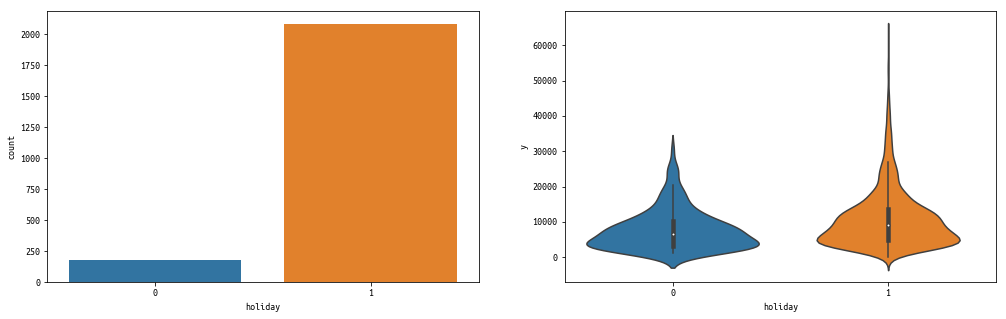

In [10]:
all_df['holiday'] = all_df['weekday'].apply(lambda x: 1 if x in list('土日') or '祝' in x or '休' in x else 0)

plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
sns.countplot(all_df['holiday'])

plt.subplot(1, 2, 2)
sns.violinplot(x='holiday', y='y', data=all_df)
plt.show()

### 翌日が休日
- 動員数にはあまり関係なさそう

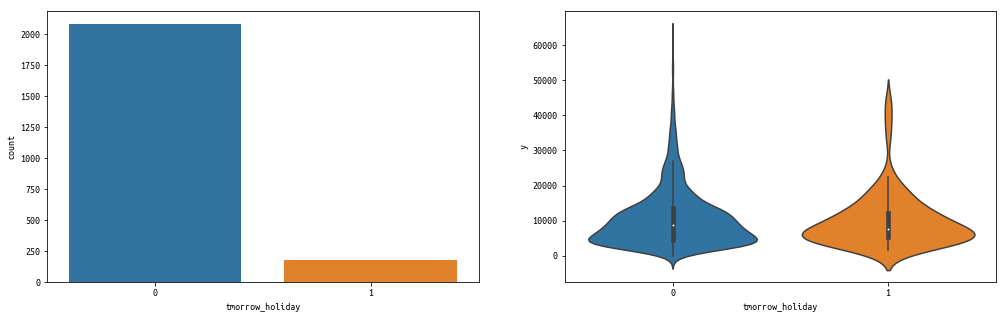

In [11]:
import sys
import datetime
sys.path.append('../src')
from jholiday import holiday_name

all_df['datetime'] = all_df.year.apply(lambda x: str(x)).str.cat(
                         all_df.gameday.apply(lambda x: x.split('(')[0]), sep='/')\
                         .apply(lambda x: datetime.datetime.strptime(x, '%Y/%m/%d'))\
                         .apply(lambda x: datetime.date(x.year, x.month, x.day))

all_df['tmorrow_holiday'] = all_df['datetime'].apply(lambda x: 1 if holiday_name(date=x + datetime.timedelta(days=1)) else 0)

plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
sns.countplot(all_df['tmorrow_holiday'])

plt.subplot(1, 2, 2)
sns.violinplot(x='tmorrow_holiday', y='y', data=all_df)
plt.show()

### 開始時刻
- 開始時刻によって観客動員数のばらつきが見られる

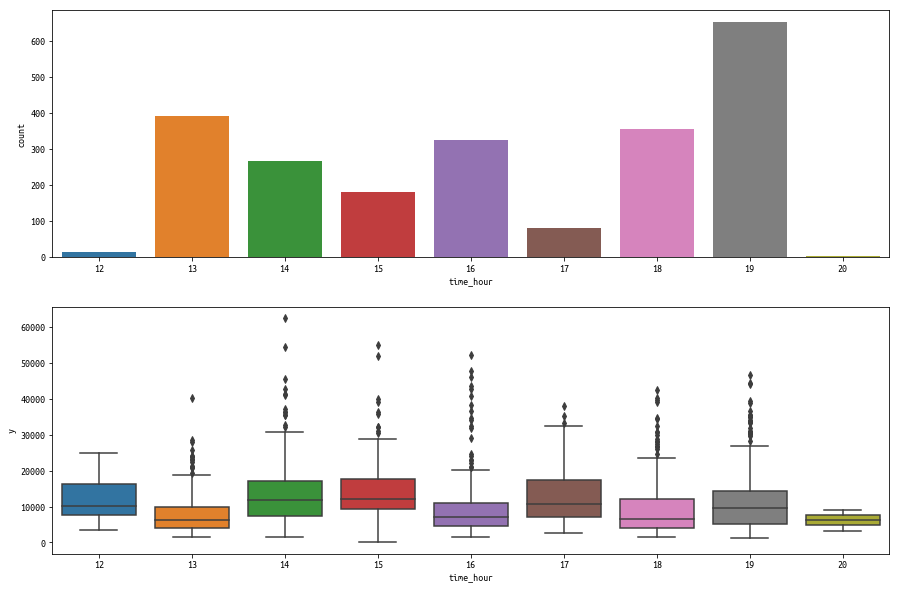

In [12]:
all_df['time_hour'] = all_df['time'].apply(lambda x: int(x.split(':')[0]))

plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
sns.countplot(all_df['time_hour'])

plt.subplot(2, 1, 2)
sns.boxplot(x='time_hour', y='y', data=all_df)
plt.show()

## 開催大会: stage

- リーグが違うと観客動員数がかなり変わる
    - モデルを分けたほうが良い？

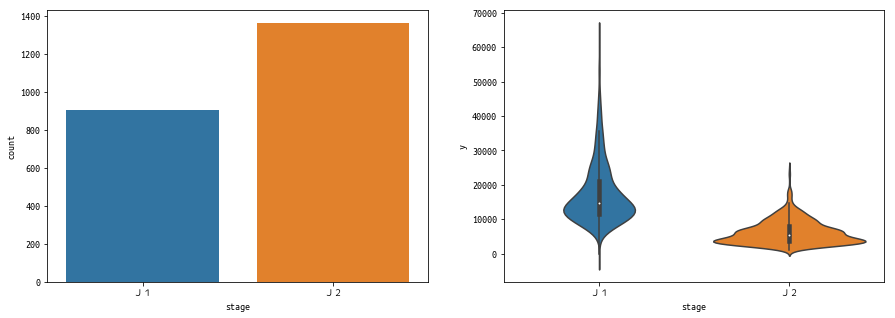

In [13]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(all_df['stage'])

plt.subplot(1, 2, 2)
sns.violinplot(x='stage', y='y', data=train_df)


## ホームチーム: home

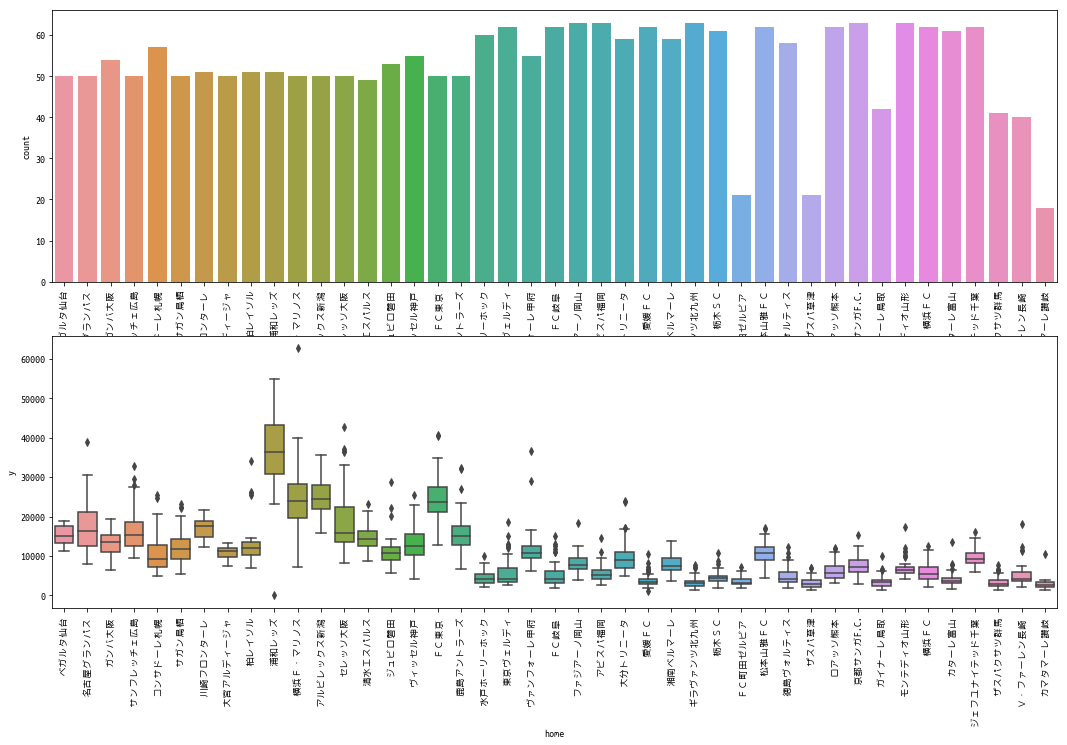

In [14]:
plt.figure(figsize=(18, 11))
plt.subplot(2, 1, 1)
sns.countplot(all_df['home'])
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
sns.boxplot(x='home', y='y' , data=all_df)
plt.xticks(rotation=90)
plt.show()


## アウェイチーム: away

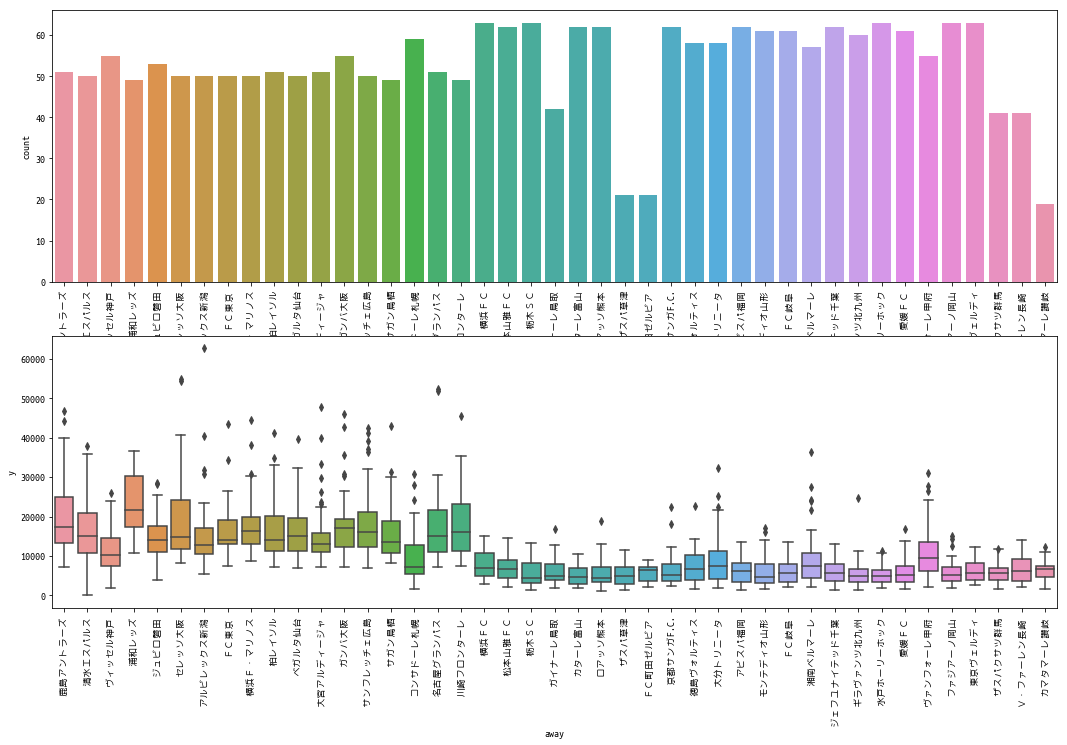

In [15]:
plt.figure(figsize=(18, 11))
plt.subplot(2, 1, 1)
sns.countplot(all_df['away'])
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
sns.boxplot(x='away', y='y' , data=all_df)
plt.xticks(rotation=90)
plt.show()

## スタジアム: stadium

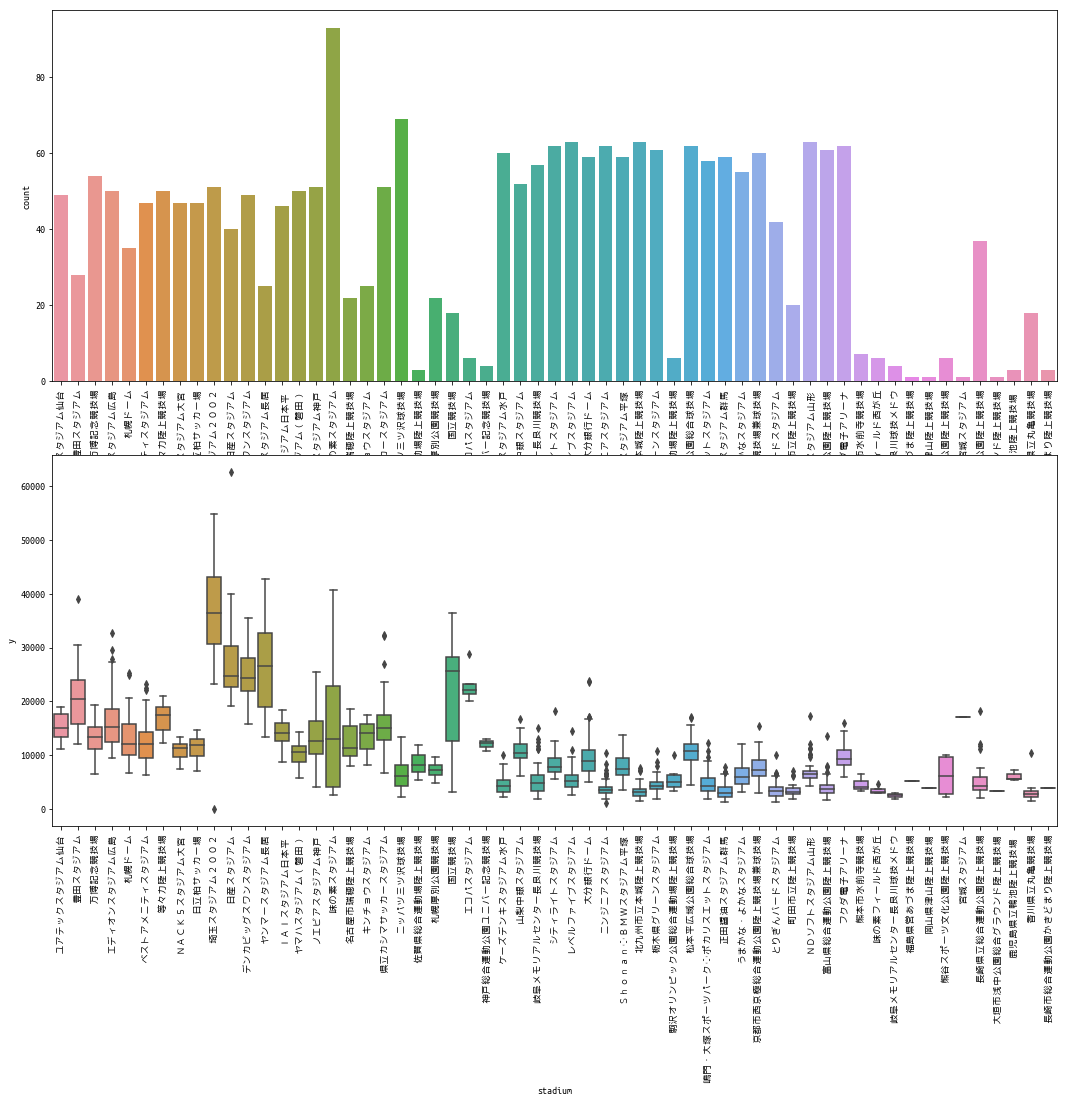

In [16]:
plt.figure(figsize=(18, 15))
plt.subplot(2, 1, 1)
sns.countplot(all_df['stadium'])
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
sns.boxplot(x='stadium', y='y' , data=all_df)
plt.xticks(rotation=90)
plt.show()

## TV放送: tv

In [17]:
tv_group = {
    '日本テレビ系': ['あいテレビ', 'テレビ信州', 'テレビ大分', 'テレビ新潟', 'ミヤギテレビ', '中京テレビ（録）', '山梨放送',
                     '日本海テレビ', '札幌テレビ', '熊本県民テレビ', '福岡放送（録）', '西日本放送', '長崎国際テレビ',],
    'ＴＢＳ系'    : ['テレビ山梨', '中国放送', '信越放送', '山陽放送', '新潟放送', '東北放送', '毎日放送（録）', '熊本放送',
                     '静岡放送', 'ＢＳ－ＴＢＳ', 'ＢＳ－ＴＢＳ（録）',],
    'フジテレビ系': ['テレビ愛媛（録）', 'テレビ西日本', 'テレビ静岡', '仙台放送', '富山テレビ', '岡山放送', '岡山放送（録）',
                     '新潟総合テレビ', '東海テレビ（録）', '長野放送', ],
    'テレビ朝日系': ['北海道テレビ', '名古屋テレビ（録）', '山形テレビ', '新潟テレビ２１', '東日本放送', '長野朝日放送',],
    'テレビ東京系': ['テレビせとうち', 'テレビ大阪'],
    '独立局'      : ['とちぎテレビ', 'とちぎテレビ（録）', 'テレビ神奈川', 'テレ玉', 'テレ玉（録）', '岐阜放送', '岐阜放送（録）',
                     '群馬テレビ', '群馬テレビ（録）', 'ＫＢＳ京都', 'ＫＢＳ京都（録）', 'ＴＯＫＹＯ\u3000ＭＸ',
                     'ＴＯＫＹＯ\u3000ＭＸ（録）',],
    'NHK'         : ['ＮＨＫ\u3000ＢＳ１', 'ＮＨＫ\u3000ＢＳ１（録）', 'ＮＨＫ\u3000ＢＳ１（１０１ｃｈ）',
                     'ＮＨＫ\u3000ＢＳ１（１０２ｃｈ）', 'ＮＨＫ京都', 'ＮＨＫ仙台', 'ＮＨＫ佐賀',
                     'ＮＨＫ前橋', 'ＮＨＫ北九州', 'ＮＨＫ名古屋', 'ＮＨＫ大分', 'ＮＨＫ大阪', 'ＮＨＫ宇都宮',
                     'ＮＨＫ富山', 'ＮＨＫ山形', 'ＮＨＫ岐阜', 'ＮＨＫ岡山', 'ＮＨＫ広島', 'ＮＨＫ徳島', 'ＮＨＫ徳島（録）',
                     'ＮＨＫ新潟', 'ＮＨＫ札幌', 'ＮＨＫ松山', 'ＮＨＫ水戸', 'ＮＨＫ水戸（録）', 'ＮＨＫ熊本',
                     'ＮＨＫ甲府', 'ＮＨＫ神戸', 'ＮＨＫ福岡', 'ＮＨＫ総合', 'ＮＨＫ長崎', 'ＮＨＫ長野', 'ＮＨＫ長野（録）',
                     'ＮＨＫ静岡', 'ＮＨＫ鳥取',],
    'スカパー'    : ['スカパー', 'スカパー光',
                     'スカパー光（スカイ・Ａ\u3000ｓｐｏｒｔｓ＋）',
                     'スカパー光（Ｊ\u3000ＳＰＯＲＴＳ\u3000１）',
                     'スカパー光（Ｊ\u3000ＳＰＯＲＴＳ\u3000４）',
                     'スカパー光（ＴＢＳチャンネル）',
                     'スカパー！',
                     'スカパー！プレミアムサービス',
                     'スカパー！プレミアムサービス※１',
                     'ｅ２', 'ｅ２（スカイ・Ａ\u3000ｓｐｏｒｔｓ＋）', 'ｅ２（録）'],
    'BS'          : ['ＢＳ－ＴＢＳ', 'ＢＳ－ＴＢＳ（録）', 'ＮＨＫ\u3000ＢＳ１', 'ＮＨＫ\u3000ＢＳ１（録）',
                     'ＮＨＫ\u3000ＢＳ１（１０１ｃｈ）', 'ＮＨＫ\u3000ＢＳ１（１０２ｃｈ）']
}

all_df['tvs'] = all_df['tv'].apply(lambda x: x.split('／'))
for group, tvs in tv_group.items():
    all_df[group] = [1 if set(tvs).intersection(tv) else 0 for tv in all_df['tvs']]

In [18]:
all_df[list(tv_group.keys())].describe()

,日本テレビ系,ＴＢＳ系,フジテレビ系,テレビ朝日系,テレビ東京系,独立局,NHK,スカパー,BS
count,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.0,2266.000000
mean,0.014563,0.030009,0.015446,0.007061,0.000883,0.101059,0.142542,1.0,0.070609
std,0.119822,0.170649,0.123344,0.083750,0.029702,0.301474,0.349682,0.0,0.256227
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [19]:
all_df[list(tv_group.keys())].sum()

日本テレビ系      33
ＴＢＳ系        68
フジテレビ系      35
テレビ朝日系      16
テレビ東京系       2
独立局        229
NHK        323
スカパー      2266
BS         160
dtype: int64

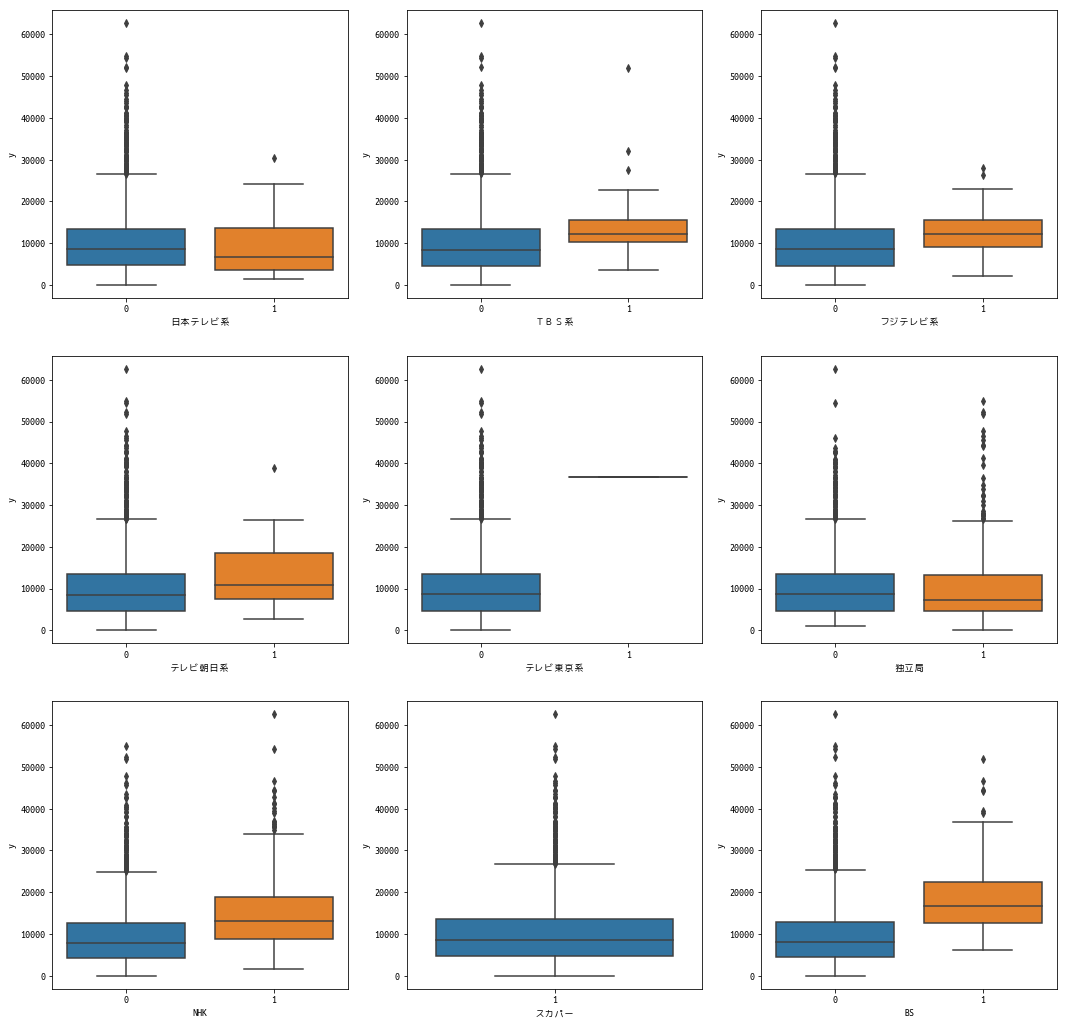

In [20]:
plt.figure(figsize=(18, 18))
for i, tv in enumerate(list(tv_group.keys())):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=tv, y='y', data=all_df)

### 地上波放送されたもの

- 地上波放送されたもののほうが観客動員数が多そう

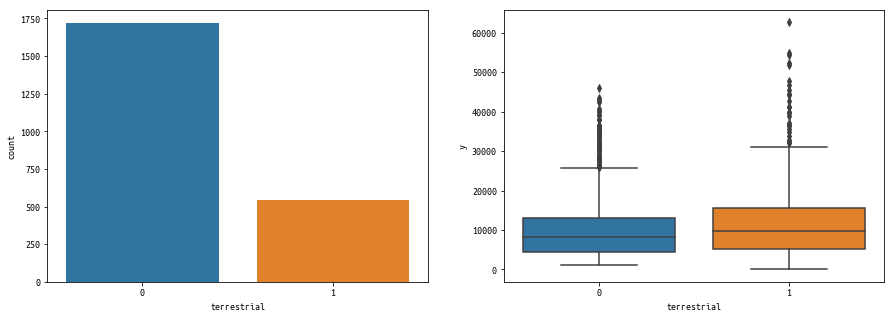

In [21]:
all_df['terrestrial'] = all_df['tv'].apply(lambda x:1 if any([tv not in tv_group['BS'] + \
                                                              tv_group['スカパー'] for tv in x.split('／')]) else 0)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(all_df['terrestrial'])

plt.subplot(1, 2, 2)
sns.boxplot(x='terrestrial', y='y', data=all_df)
plt.show()

### 録画が放送されたもの

- 録画放送のあった試合は観客動員数も少ない?
    - 録画放送があったデータ数が少ないので微妙かも

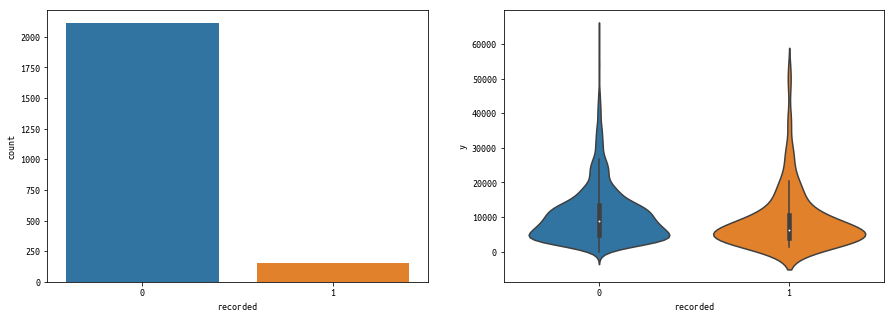

In [22]:
all_df['recorded'] = all_df['tv'].apply(lambda x: 1 if '（録）' in x else 0)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(all_df['recorded'])

plt.subplot(1, 2, 2)
sns.violinplot(x='recorded', y='y', data=all_df, )
plt.show()

# 追加のデータ

- 試合詳細データ(condition.csv)
- 試合詳細追加データ(condition_add.csv)
- スタジアムデータ(stadium.csv)

In [23]:
condition_df = pd.concat([pd.read_csv('../input/condition.csv'),
                          pd.read_csv('../input/condition_add.csv')])
stadium_df = pd.read_csv('../input/stadium.csv')

## condition.csv

In [24]:
print(condition_df.info())
condition_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2304 entries, 0 to 269
Data columns (total 31 columns):
id             2304 non-null int64
home_score     2304 non-null int64
away_score     2304 non-null int64
weather        2304 non-null object
temperature    2304 non-null float64
humidity       2304 non-null object
referee        2304 non-null object
home_team      2304 non-null object
home_01        2304 non-null object
home_02        2304 non-null object
home_03        2304 non-null object
home_04        2304 non-null object
home_05        2304 non-null object
home_06        2304 non-null object
home_07        2304 non-null object
home_08        2304 non-null object
home_09        2304 non-null object
home_10        2304 non-null object
home_11        2304 non-null object
away_team      2304 non-null object
away_01        2304 non-null object
away_02        2304 non-null object
away_03        2304 non-null object
away_04        2304 non-null object
away_05        2304 non-null obj

,id,home_score,away_score,weather,temperature,humidity,referee,home_team,home_01,home_02,...,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11
0,13994,1,0,雨,3.8,66%,木村 博之,ベガルタ仙台,林 卓人,菅井 直樹,...,新井場 徹,岩政 大樹,中田 浩二,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ
1,13995,1,0,屋内,12.4,43%,西村 雄一,名古屋グランパス,楢﨑 正剛,田中 隼磨,...,吉田 豊,岩下 敬輔,カルフィン ヨン ア ピン,李 記帝,村松 大輔,河井 陽介,枝村 匠馬,高木 俊幸,アレックス,大前 元紀
2,13996,2,3,晴一時雨,11.3,41%,高山 啓義,ガンバ大阪,藤ヶ谷 陽介,加地 亮,...,近藤 岳登,北本 久仁衛,伊野波 雅彦,相馬 崇人,三原 雅俊,田中 英雄,野沢 拓也,橋本 英郎,森岡 亮太,大久保 嘉人
3,13997,1,0,曇一時雨のち晴,11.4,52%,松尾 一,サンフレッチェ広島,西川 周作,森脇 良太,...,濱田 水輝,阿部 勇樹,槙野 智章,平川 忠亮,鈴木 啓太,山田 直輝,梅崎 司,柏木 陽介,原口 元気,田中 達也
4,13998,0,0,屋内,22.5,32%,廣瀬 格,コンサドーレ札幌,李 昊乗,高木 純平,...,駒野 友一,チョ ビョングク,藤田 義明,山本 脩斗,小林 裕紀,山本 康裕,山田 大記,松浦 拓弥,菅沼 実,前田 遼一


### 天気

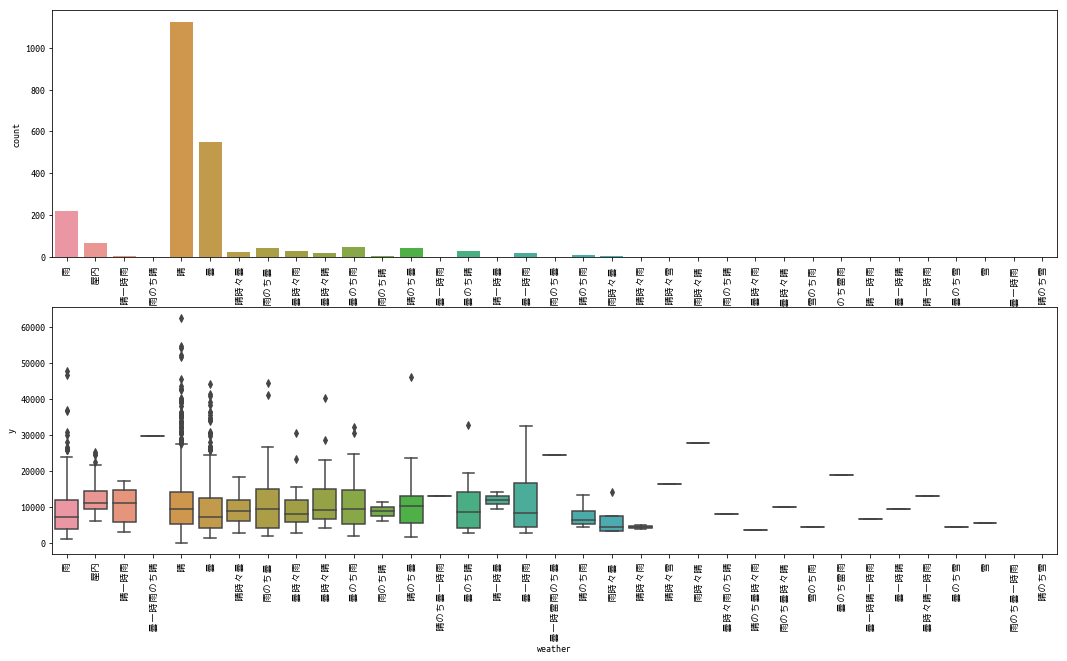

In [25]:
allc_df = pd.merge(all_df, condition_df, on='id')

plt.figure(figsize=(18, 10))
plt.subplot(2, 1, 1)
sns.countplot(allc_df['weather'])
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
sns.boxplot(x='weather', y='y', data=allc_df)
plt.xticks(rotation=90)
plt.show()

- 天気が'雨'
    - 雨だと若干平均は下がってる

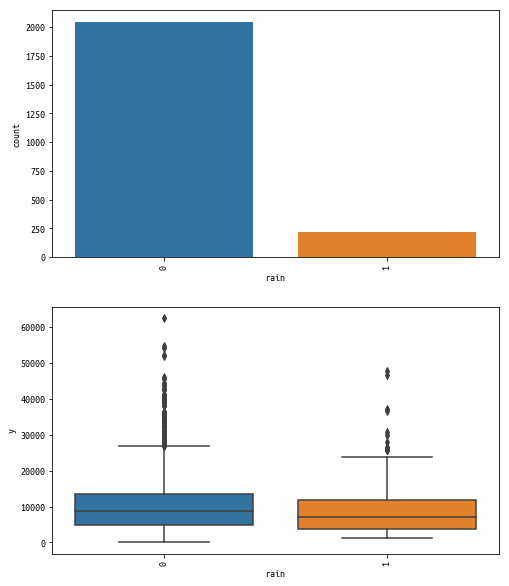

In [26]:
allc_df['rain'] = allc_df['weather'].apply(lambda x: 1 if '雨' == x else 0)

plt.figure(figsize=(8, 10))
plt.subplot(2, 1, 1)
sns.countplot(allc_df['rain'])
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
sns.boxplot(x='rain', y='y', data=allc_df)
plt.xticks(rotation=90)
plt.show()

- 雨(ちょっとでも雨が降ってたら雨)
    - '雨'の時とあまり変わらない

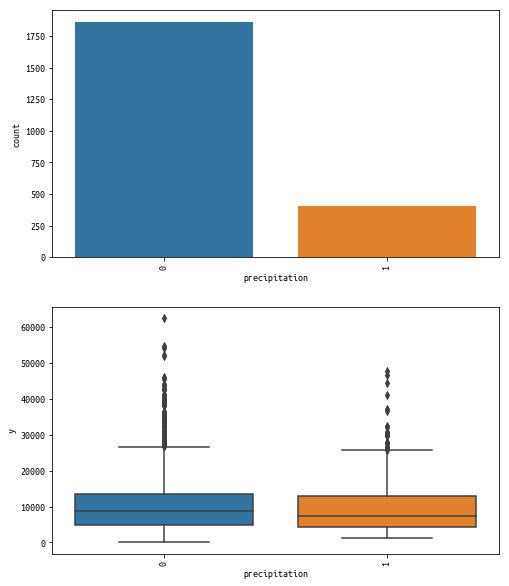

In [27]:
allc_df['precipitation'] = allc_df['weather'].apply(lambda x: 1 if '雨' in x else 0)

plt.figure(figsize=(8, 10))
plt.subplot(2, 1, 1)
sns.countplot(allc_df['precipitation'])
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
sns.boxplot(x='precipitation', y='y', data=allc_df)
plt.xticks(rotation=90)
plt.show()

- 気温と湿度
    - 観客動員数には関係なさそう

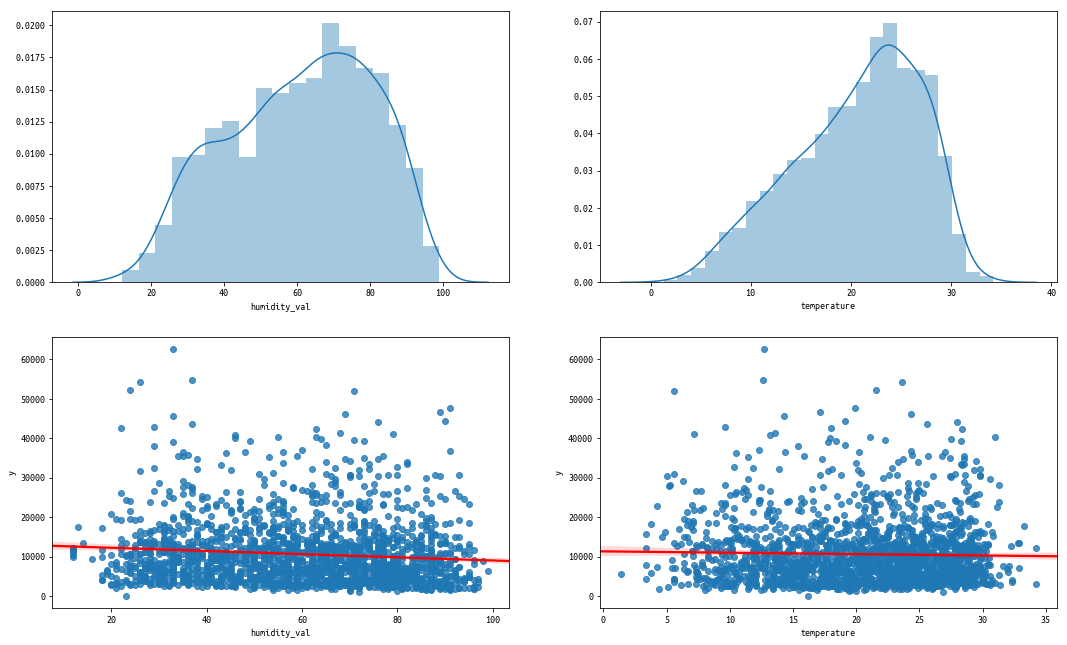

In [28]:
allc_df['humidity_val'] = allc_df['humidity'].apply(lambda x: float(x[:-1]))

plt.figure(figsize=(18, 11))
plt.subplot(2, 2, 1)
sns.distplot(allc_df['humidity_val'])

plt.subplot(2, 2, 2)
sns.distplot(allc_df['temperature'])

plt.subplot(2, 2, 3)
sns.regplot(x='humidity_val', y='y', data=allc_df, line_kws={'color': 'r'})

plt.subplot(2, 2, 4)
sns.regplot(x='temperature', y='y', data=allc_df, line_kws={'color': 'r'})

plt.show()

- 屋内と屋外
    - 屋内の時は若干人が多くなる？
    - 屋内のデータが少ないので微妙かも

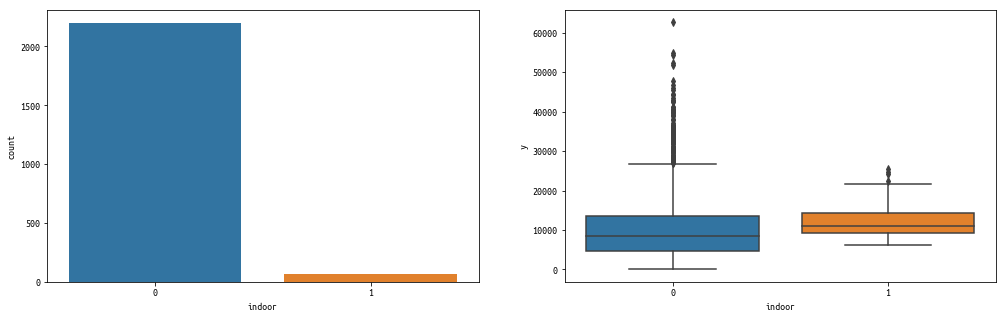

In [29]:
allc_df['indoor'] = allc_df['weather'].apply(lambda x: 1 if x == '屋内' else 0)

plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
sns.countplot(allc_df['indoor'])

plt.subplot(1, 2, 2)
sns.boxplot(x='indoor', y='y', data=allc_df)
plt.show()

### 得点

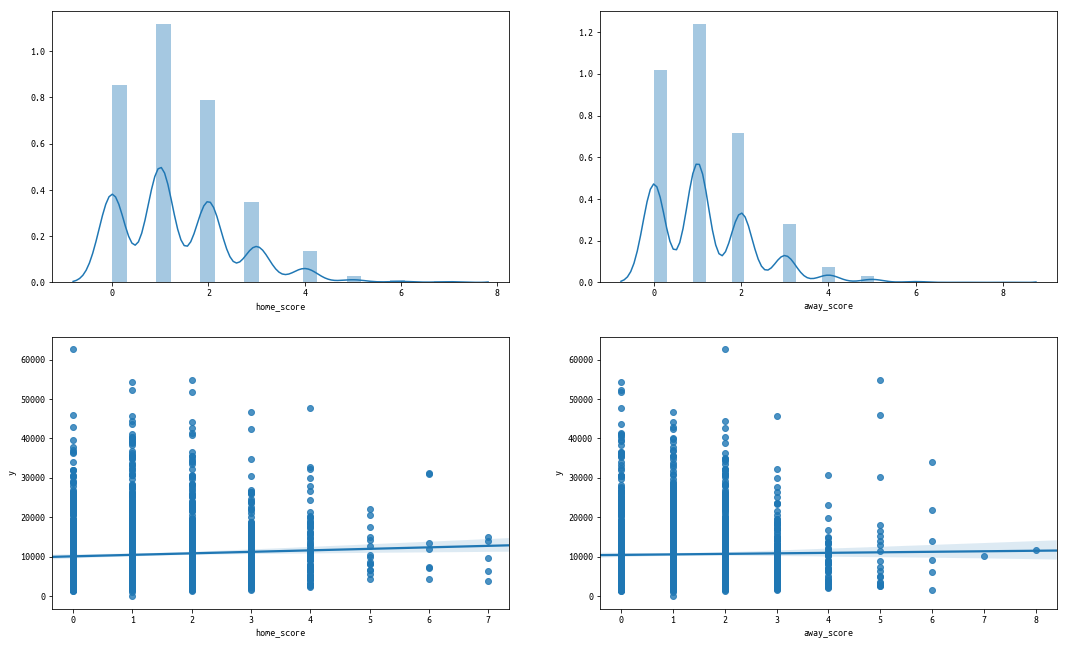

In [30]:
plt.figure(figsize=(18, 11))
plt.subplot(2, 2, 1)
sns.distplot(allc_df['home_score'])

plt.subplot(2, 2, 2)
sns.distplot(allc_df['away_score'])

plt.subplot(2, 2, 3)
sns.regplot(x='home_score', y='y', data=allc_df)

plt.subplot(2, 2, 4)
sns.regplot(x='away_score', y='y', data=allc_df)

plt.show()

## stadium.csv

In [31]:
print(stadium_df.info())
stadium_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 3 columns):
name       59 non-null object
address    59 non-null object
capa       59 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.5+ KB
None


,name,address,capa
0,名古屋市瑞穂陸上競技場,愛知県名古屋市瑞穂区山下通5-1,20000
1,豊田スタジアム,愛知県豊田市千石町7-2,40000
2,フクダ電子アリーナ,千葉県千葉市中央区川崎町1-20,18500
3,日立柏サッカー場,千葉県柏市日立台1-2-50,15349
4,ニンジニアスタジアム,愛媛県松山市上野町乙46,15576


### 県
- 埼玉は２つJ1チームがあるからか動員数も多い

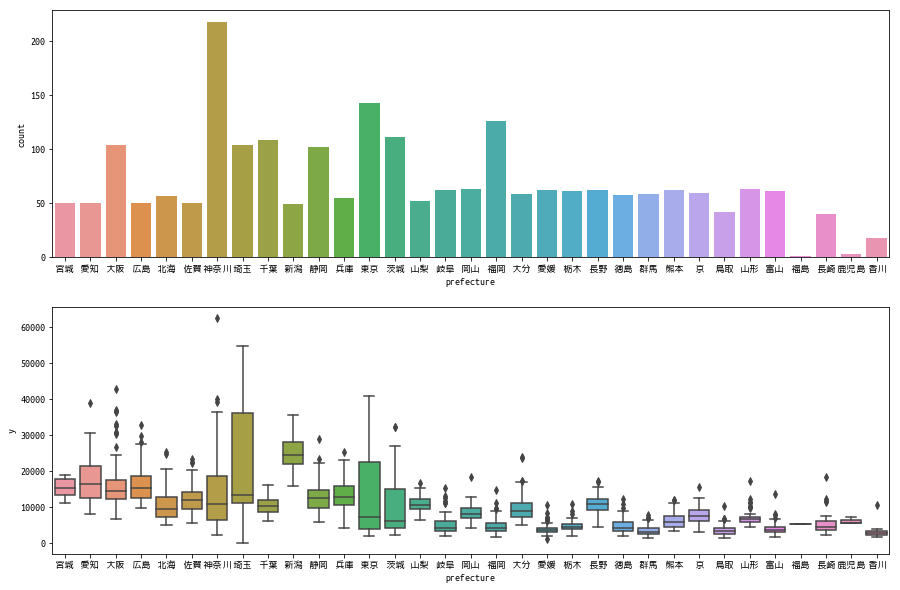

In [32]:
import re
alls_df = pd.merge(all_df, stadium_df, how='left', left_on='stadium', right_on='name')
alls_df['prefecture'] = alls_df['address'].apply(lambda x: re.split(r'都|道|府|県', x)[0])

plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
sns.countplot(alls_df['prefecture'])

plt.subplot(2, 1, 2)
sns.boxplot(x='prefecture', y='y', data=alls_df)
plt.show()

### 市区町村

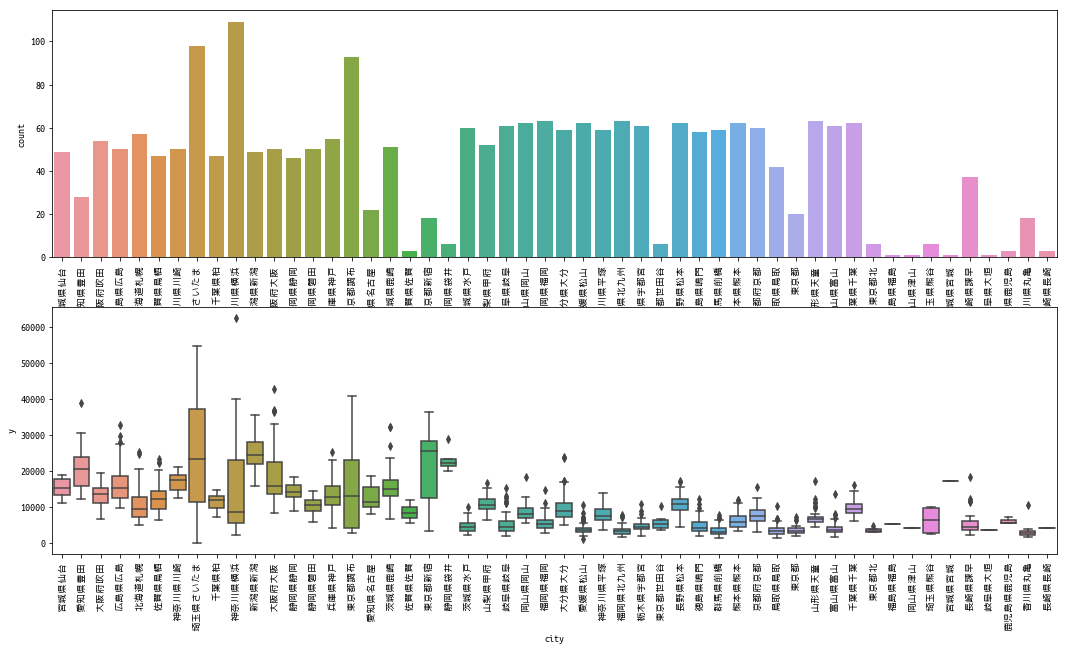

In [33]:
alls_df = pd.merge(all_df, stadium_df, how='left', left_on='stadium', right_on='name')
alls_df['city'] = alls_df['address'].apply(lambda x: re.split(r'市|区|町|村|郡', x)[0])

plt.figure(figsize=(18, 10))
plt.subplot(2, 1, 1)
sns.countplot(alls_df['city'])
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
sns.boxplot(x='city', y='y', data=alls_df)
plt.xticks(rotation=90)
plt.show()

### capa
- キャパが増えると動員数も多くなる(当然)

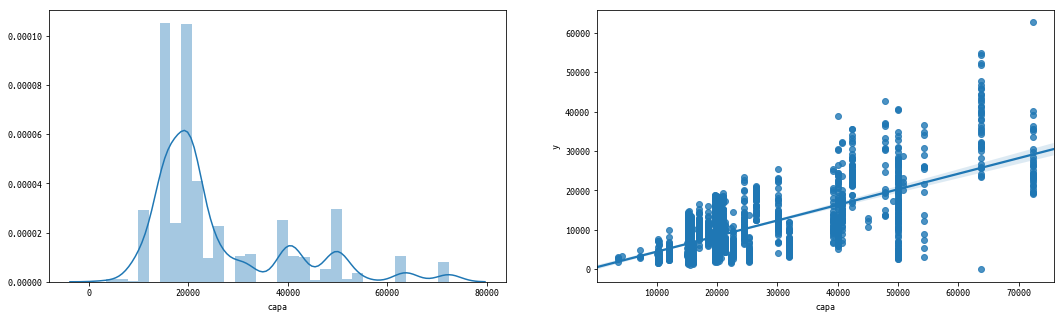

In [34]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
sns.distplot(alls_df['capa'])

plt.subplot(1, 2, 2)
sns.regplot(x='capa', y='y', data=alls_df)
plt.show()